<a href="https://colab.research.google.com/github/farielshafee2018/Amazon-FC/blob/main/amazon_Youtube_keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

This notebook finds the most frequent keywords in videos about Amazon FC

In [ ]:
data = pd.read_csv("/content/youtube_data_cleaned(2).csv")

In [ ]:
data.head()

,Unnamed: 0,S No.,Link,Upload Date,Views,Likes,Comments,Transcript/Transcript Link,transcript_cleaned
0,0,NaN,https://www.youtube.com/watch?v=bU1xOB4oT8E,2025-01-06,1079,83,0,I hate my job. Most physical job in the buildi...,hate job physical job building feel like numbe...
1,1,2.0,https://www.youtube.com/watch?v=FnK9JEL62x8,2024-10-03,503,12,0,"knocked my camera, eternal transfer",knocked camera eternal transfer
2,2,3.0,https://www.youtube.com/watch?v=oK7iF-zCWPc321,2024-12-16,321,5,0,"11 to 12 hour shift, draining, strips creativi...",11 12 hour shift draining strips creativity aw...
3,3,4.0,https://www.youtube.com/watch?v=womH-sRkxXY,2025-07-10,65,3,0,tedious job at same speed for 6 to 7 hrs a day...,tedious job speed 6 7 hrs day treated like number
4,4,5.0,"https://www.youtube.com/watch?v=OreJan 6, 2025...",NaN,863,43,2,standing on my feet for hours. My leg hurts. ...,standing feet hours leg hurts give shoes takes...


In [ ]:
from collections import Counter

# Join all cleaned reviews into one big string, then split into words
all_words = ' '.join(data['transcript_cleaned']).split()

# Count frequency of each word
word_counts = Counter(all_words)

In [ ]:
print(word_counts.most_common(5))


[('job', 5), ('feel', 3), ('hour', 3), ('like', 2), ('number', 2)]


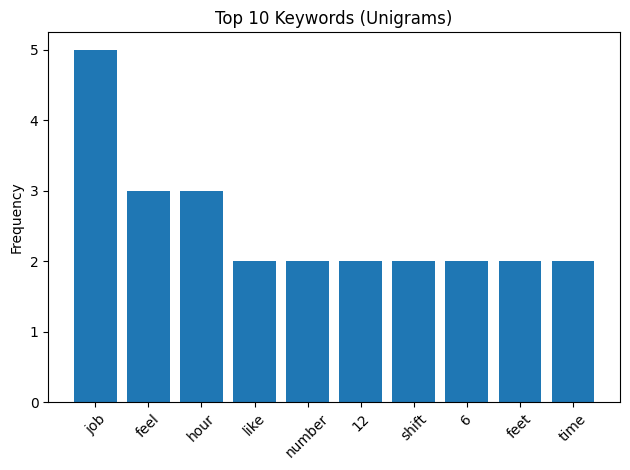

In [ ]:
import matplotlib.pyplot as plt

most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
stop_keywords = ['job','feel']
filtered_words = [word for word in all_words if word not in stop_keywords]
filtered_counts = Counter(filtered_words)


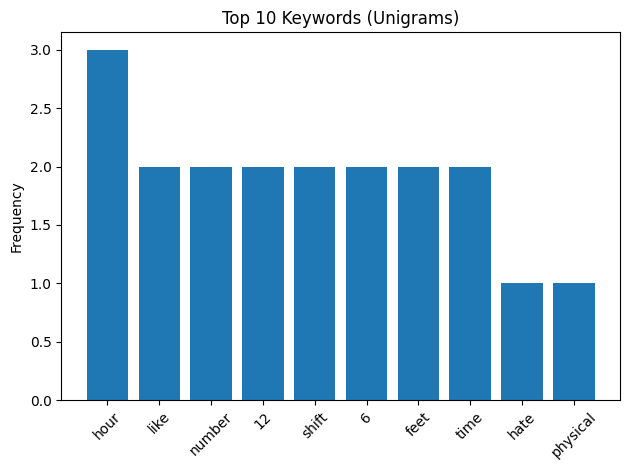

In [ ]:
import matplotlib.pyplot as plt

most_common = filtered_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

In [ ]:
print(bigram_counts.most_common(5))

[(('like', 'number'), 2), (('12', 'hour'), 2), (('hate', 'job'), 1), (('job', 'physical'), 1), (('physical', 'job'), 1)]


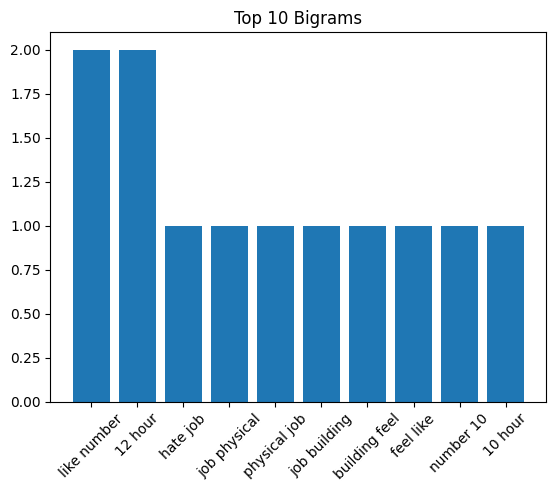

In [ ]:
# For bigrams
common_bigrams = bigram_counts.most_common(10)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


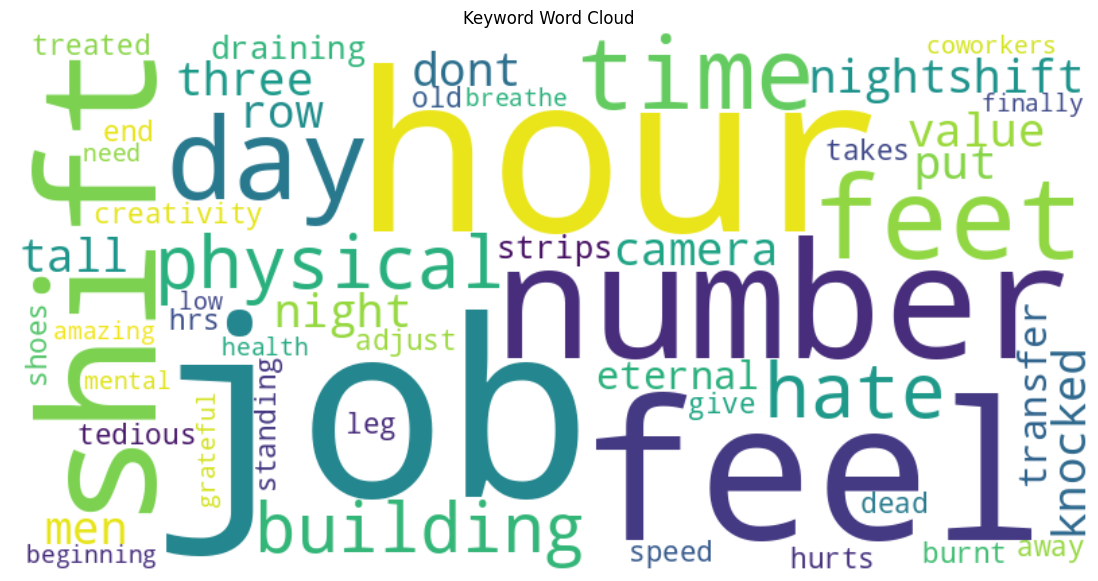

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()